# Skin Cancer Detection

Deep Learning aplicada ao diagnóstico de câncer de pele e de outras lesões na pele.

Para a criação do modelo se dará em duas partes:
- Rede Neural Convolucional (CNN) para classificação das doenças através da análise de imagens;
- Rede Neural Artificial do tipo Multilayer Perceptron (MLP) para realização do diagnóstico final, baseado nas saídas das CNNs e nos demais atributos preditores.
    
Para realização do treinamento, será utilizado o [Skin Cancer Mnist](https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/home), fornecido pela plataforma [Kaggle](https://www.kaggle.com).

## Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from math import ceil
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [12]:
######## Espaço para deep learning ########

## Dataset 

In [2]:
dataset = pd.read_csv('HAM10000_metadata.csv')

#Categorização do atributo 'localization'
data_localization = pd.get_dummies(dataset.localization)
dataset = pd.concat([dataset, data_localization], axis=1)

#Categorização do atributo 'sex'
data_sex = pd.get_dummies(dataset.sex)
dataset = pd.concat([dataset, data_sex], axis=1)

dataset = dataset.drop(['sex', 'localization'], axis = 1)

dataset.columns =['lesion_id', 'image_id', 'dx', 'dx_type', 'age', 'abdomen', 'acral',
       'back', 'chest', 'ear', 'face', 'foot', 'genital', 'hand',
       'lower extremity', 'neck', 'scalp', 'trunk', 'unknown_loc',
       'upper extremity', 'female', 'male', 'unknown_sex']

dataset.head()

,lesion_id,image_id,dx,dx_type,age,abdomen,acral,back,chest,ear,...,hand,lower extremity,neck,scalp,trunk,unknown_loc,upper extremity,female,male,unknown_sex
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


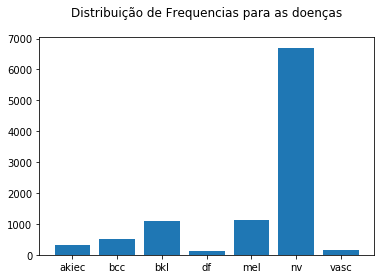

In [21]:
classes = []
freq = []
for i in range(len(dataset.groupby('dx').size())):
    classes.append(dataset.groupby('dx').size().index[i])
    freq.append(dataset.groupby('dx').size()[i])
    
plt.bar(classes, freq)
plt.title('Distribuição de Frequencias para as doenças\n')
plt.show()

## Regra da Pirâmide Geométrica

Implementação da Regra da Pirâmide Geométrica para determinação da quantidade de Neurônios Ocultos

        Nh = α·√(Ni·No) ; Nh = Número de Neurônios Ocultos
                          Ni = Número de Neurônios de Entrada
                          No = Número de Neurônios de Saída
                          α  = Constante

In [7]:
def piramide_geometrica(ni, no, alfa):
    nh = alfa*((ni*no)**(1/2))
    return ceil(nh)

##  Distribuição dos Neurônios em duas Camadas Ocultas

Função para gerar todas as possíveis 2-tuplas que representam o número de neurônios distribuídos por duas camadas ocultas de uma RNA do tipo MLP, dado o número de neurônios ocultos obtidos previamente pela Regra da Pirâmide Geométrica.

In [8]:
def hidden_layers(layers, nh):
    for i in range(1, nh):
        neurons_layers = (i, nh-i)
        layers.append(neurons_layers)
    return layers

### Criação de Lista de Camadas Ocultas a Partir da Regra da Pirâmide Geométrica

In [12]:
num_in = 25
num_out = 7
alpha = [0.5, 1, 2, 3]
layers = []

In [13]:
for i in range(len(alpha)):
    nh = piramide_geometrica(num_in, num_out, alpha[i])
    print('Para α = %.1f, Nh = %d'%(alpha[i],nh))
    hidden_layers(layers, nh)#insere cada possibilidade de camadas ocultas, dado o numero de neurônios, na lista 'layers'
    
print()
print('Distribuições de Camadas Ocultas:\n')
for i in layers:
    print(i)

Para α = 0.5, Nh = 7
Para α = 1.0, Nh = 14
Para α = 2.0, Nh = 27
Para α = 3.0, Nh = 40

Distribuições de Camadas Ocultas:

(1, 6)
(2, 5)
(3, 4)
(4, 3)
(5, 2)
(6, 1)
(1, 13)
(2, 12)
(3, 11)
(4, 10)
(5, 9)
(6, 8)
(7, 7)
(8, 6)
(9, 5)
(10, 4)
(11, 3)
(12, 2)
(13, 1)
(1, 26)
(2, 25)
(3, 24)
(4, 23)
(5, 22)
(6, 21)
(7, 20)
(8, 19)
(9, 18)
(10, 17)
(11, 16)
(12, 15)
(13, 14)
(14, 13)
(15, 12)
(16, 11)
(17, 10)
(18, 9)
(19, 8)
(20, 7)
(21, 6)
(22, 5)
(23, 4)
(24, 3)
(25, 2)
(26, 1)
(1, 39)
(2, 38)
(3, 37)
(4, 36)
(5, 35)
(6, 34)
(7, 33)
(8, 32)
(9, 31)
(10, 30)
(11, 29)
(12, 28)
(13, 27)
(14, 26)
(15, 25)
(16, 24)
(17, 23)
(18, 22)
(19, 21)
(20, 20)
(21, 19)
(22, 18)
(23, 17)
(24, 16)
(25, 15)
(26, 14)
(27, 13)
(28, 12)
(29, 11)
(30, 10)
(31, 9)
(32, 8)
(33, 7)
(34, 6)
(35, 5)
(36, 4)
(37, 3)
(38, 2)
(39, 1)


## Busca em Grade

In [9]:
parameters = {'solver': ['lbfgs', 'adam', 'sgd'], 
              'activation': ['identity', 'logistic', 'tanh', 'relu'],
              'hidden_layer_sizes': layers,
              'max_iter':[1000, 2000, 5000],
              'learning_rate_init':[0.005, 0.0005, 0.0001],
              'learning_rate': ['adaptive', 'constant']}

gs = GridSearchCV(MLPClassifier(), 
                  parameters, 
                  cv=3, 
                  scoring='accuracy')

In [8]:
x = dataset.drop(['dx', 'lesion_id', 'image_id', 'dx_type'], axis = 1) #Atributos preditores
y = dataset.dx #Atributo Alvo

### Treinamento 

Treinamento de todas as combinações de RNAs definidas no GridSearchCV( )

In [ ]:
gs.fit(x, y)

# Resultados

### Acurácia e Parâmetros do melhor modelo:

In [ ]:
#Acurácia para o conjunto de testes
print('Acurácia média para os 3 splits de teste do melhor modelo:',gs.best_score_)

print('\nParâmetros:')
for key in gs.best_params_.keys():
    print('\t',key, ': ', gs.best_params_[key])